In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve

In [2]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [3]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [4]:
df_x=df["text"]
df_y=df["y"]

In [5]:
cv = CountVectorizer()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [7]:
x_train.head()

1518    Islamophobia VS. Freedomophobia  If there's a ...
2085    I’ve been feeling like I don’t vibe the same w...
2723    Cancel the funeral, because I decided to live....
3885    1828 2 Vol Memoires Apothicaire BLAZE Spanish ...
2876    (Lat/Lon= 7.612919,38.685897) : 4fe644eb-cf20-...
Name: text, dtype: object

In [8]:
cv = CountVectorizer(stop_words='english', lowercase='True')

In [9]:
x_traincv=cv.fit_transform(x_train)
x_train.iloc[0]

"Islamophobia VS. Freedomophobia  If there's a phobia, it exists in Islamic countries that are afraid of freedom!  Those who keep preaching to us about Islamophobia should preach to those scared of:  Women showing their hair, driving cars, worshipping Jesus https://t.co/I5gIodixhc https://t.co/dziO2FDn6y"

In [10]:
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [11]:
x_testcv=cv.transform(x_test)
x_testcv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
mnb = MultinomialNB()

In [13]:

y_train=y_train.astype('int')
y_train

1518    0
2085    1
2723    1
3885    1
2876    1
       ..
2023    1
3465    1
1164    0
3199    1
2932    1
Name: y, Length: 3110, dtype: int32

In [14]:
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [15]:
testmessage=x_test.iloc[0]
testmessage

'Loyalty is a lifestyle.'

In [16]:
predictions=mnb.predict(x_testcv)

In [17]:
a=np.array(y_test)

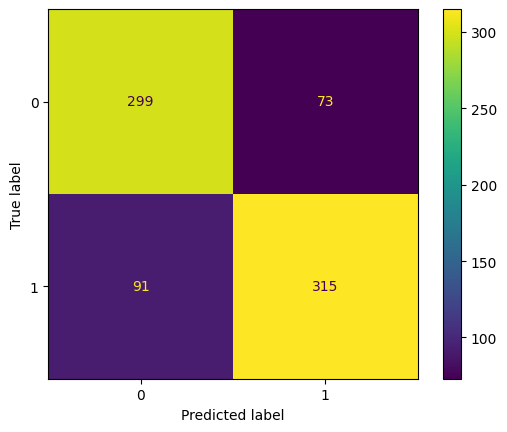

In [18]:
log_reg_cm = confusion_matrix(y_test, predictions, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= log_reg_cm , display_labels=mnb.classes_)
disp.plot()

In [19]:

print(classification_report(y_test, predictions))
print("Accuracy: ", mnb.score(x_testcv, y_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       372
           1       0.81      0.78      0.79       406

    accuracy                           0.79       778
   macro avg       0.79      0.79      0.79       778
weighted avg       0.79      0.79      0.79       778

Accuracy:  0.7892030848329049


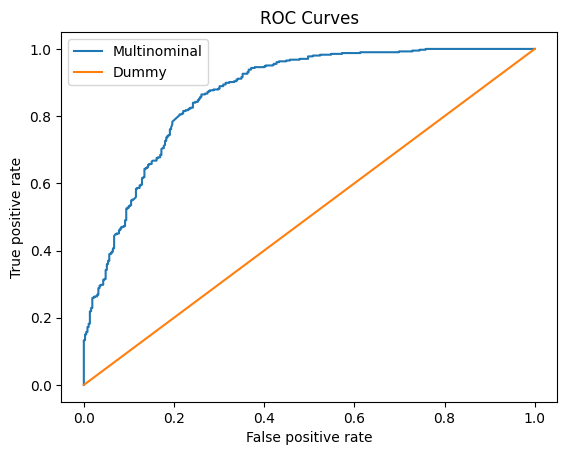

In [20]:
scores = mnb.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#dummy
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
scores = dummy.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Multinominal', 'Dummy'])
plt.show()

In [21]:
testSentence = ["the earth is flat"]
sentenceTransformed=cv.transform(testSentence)
result = mnb.predict_proba(sentenceTransformed)
print("This tweet has a: ", result[0,1], " chance of being censored.")
print("This tweet has a: ", result[0,0], " chance of being left uncensored.")

This tweet has a:  0.9277066198986549  chance of being censored.
This tweet has a:  0.07229338010134621  chance of being left uncensored.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


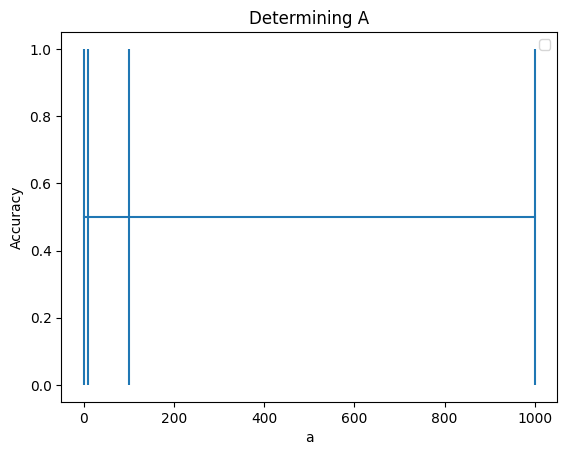

In [22]:
mean_err=[]; std_err=[]
std_err=[]
a_test = [0.001,10,100,1000]

for c in a_test:
    log_reg = MultinomialNB(alpha=a)
    mean_err.append(np.array(scores).mean())
    std_err.append(np.array(scores).std())

plt.errorbar(a_test, mean_err, yerr=std_err)
plt.xlabel('a'); plt.ylabel('Accuracy')

plt.title('Determining A')
plt.legend()
plt.show()